#### Breast cancer classification into different subtypes 

##### Introduction 

- This is one of the many datasets from Curated Microarray Database (CuMiDa),solely for machine learning.
- The dataset below is a breat cancer gene expression dataset containing the following:

    - 6 classes
    - 54676 genes
    - 151 samples


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
cancer_df= pd.read_csv('/media/danlof/dan files/data_science_codes/PROJECTS/Breast_GSE45827.csv')
cancer_df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
#data types of columns and memory usage
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


- used to show the dataframe structure,no. of non-null values,

In [4]:
cancer_df.type.value_counts()

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

- The above makes us understand more on the subtypes of the breast cancer

In [5]:
# checking to see if the type column has any missing values 
cancer_df.type.isnull().sum()

0

In [6]:
len(cancer_df)

151

##### 1. Data preprocessing

- This separates the features X from the target variables y

In [3]:
X,y = cancer_df.drop(columns='type'),cancer_df['type']

In [4]:
from sklearn.preprocessing import StandardScaler

# simplify the scaler for easy usage
sc= StandardScaler()

# scaling the features in X
X_scaled = sc.fit_transform(X)

- Performing the linear discriminant analysis

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# set n_components to 5 because we want to classify this data set(c-1)
lda= LDA(n_components=5)

X_lda= lda.fit_transform(X_scaled,y)

In [7]:
print(X_scaled.shape)

(151, 54676)


In [7]:
y.shape

(151,)

- since we got categorical values we could one encode them(norminal values)we want to perform one-hot encoding on the column name 'type'

In [8]:
from sklearn.preprocessing import OneHotEncoder

col=['type']
df=pd.get_dummies(cancer_df,columns=col)
df.head()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type_HER,type_basal,type_cell_line,type_luminal_A,type_luminal_B,type_normal
0,84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,4.901594,2.966657,3.508495,3.301999,0,1,0,0,0,0
1,85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,5.405839,2.934763,3.687666,3.064299,0,1,0,0,0,0
2,87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,5.184286,2.847684,3.550597,3.158535,0,1,0,0,0,0
3,90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,5.086569,3.031602,3.524981,3.272665,0,1,0,0,0,0
4,91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,5.235318,2.956232,3.445501,3.193947,0,1,0,0,0,0


In [9]:
# specify the new y after encoding 
y_new = df[['type_HER','type_basal','type_cell_line','type_luminal_A','type_luminal_B','type_normal']]

- divide the data into test and train sets

In [10]:
 
from sklearn.model_selection import train_test_split
# split the dataset in the following subsets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_new, 
                                                 test_size=0.3,stratify=y_new,
                                                 random_state=42)

##### 2. Modelling

- We train a multioutput random forest and a multioutput xgboot model for the above dataset

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# train a random forest classifier

rfc= RandomForestClassifier(n_estimators=100,random_state=42)
# create a multioutput classifier

multi= MultiOutputClassifier(rfc)
# training
multi.fit(X_train,y_train)

# make predictions 

y_pred= multi.predict(X_test)

#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.92      0.85      0.88        13
           2       1.00      0.75      0.86         4
           3       0.88      0.78      0.82         9
           4       1.00      0.44      0.62         9
           5       1.00      1.00      1.00         2

   micro avg       0.94      0.72      0.81        46
   macro avg       0.97      0.75      0.83        46
weighted avg       0.95      0.72      0.80        46
 samples avg       0.72      0.72      0.72        46



/home/danlof/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- most of the classes considering precision and recall, can be seen that most cases are diagonised correctly, expecially those cases that have one of the subtypes of breast cancer.
- The above is surported by the f1 scores that are mostly near 1 for most of the classes, indicating a good balance between precision and recall

- the micro average provides a global view of the model's performance across all classes and is particularly useful for understanding overall classification performance in multi-class classification scenarios.


In [12]:
multi.score(X_train,y_train)

1.0

- The above gives you the accuracy score of your machine learning model on the training data.which is perfect,the model correctly predicted the target values for all of the samples in the training dataset 

In [13]:
auc_y1 =roc_auc_score(y_test,y_pred)
auc_y1

0.8689760564760566

In [14]:
from sklearn.pipeline import Pipeline
# checking for the case of XGBoost classifier

classifier = MultiOutputClassifier(XGBClassifier())
clf = Pipeline([('classify', classifier)
               ])

#fitting

clf.fit(X_train,y_train)

#make predictions

y_hat=clf.predict(X_test)

#accuracy score
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [15]:

auc_y1 = roc_auc_score(y_test,y_hat)
auc_y1

0.8833207583207584

In [16]:
# Generate a classification report
report = classification_report(y_test, y_hat)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.92      0.85      0.88        13
           2       0.80      1.00      0.89         4
           3       0.88      0.78      0.82         9
           4       0.83      0.56      0.67         9
           5       1.00      1.00      1.00         2

   micro avg       0.87      0.74      0.80        46
   macro avg       0.88      0.79      0.82        46
weighted avg       0.87      0.74      0.79        46
 samples avg       0.73      0.74      0.73        46



/home/danlof/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from matplotlib.colors import ListedColormap

def DecisionRegions(X, y, classifier, test_idx=None, resolution=0.2):
    
    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Create a meshgrid for all 5 feature dimensions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    w_min, w_max = X[:, 3].min() - 1, X[:, 3].max() + 1
    v_min, v_max = X[:, 4].min() - 1, X[:, 4].max() + 1
    
    xx, yy, zz, ww, vv = np.meshgrid(np.arange(x_min, x_max, resolution),
                                     np.arange(y_min, y_max, resolution),
                                     np.arange(z_min, z_max, resolution),
                                     np.arange(w_min, w_max, resolution),
                                     np.arange(v_min, v_max, resolution))
    
    # Predict the labels for all points in the meshgrid
    input_data = np.c_[xx.ravel(), yy.ravel(), zz.ravel(), ww.ravel(), vv.ravel()]  # Assuming 5 features
    labels = classifier.predict(input_data)
    labels = labels.reshape(xx.shape)
    
    # Plot the decision regions
    plt.contourf(xx, yy, labels, alpha=0.3, cmap=cmap)
    
    # Set axis limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')



In [ ]:
# plotting the decision regions 

DecisionRegions(X_train,y_train,classifier=multi )

###  Principal componet analysis

In [15]:
# importing necessary libraries

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# finding the number of components needed

pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dims = np.argmax(cumsum>=0.97)+1
dims

134

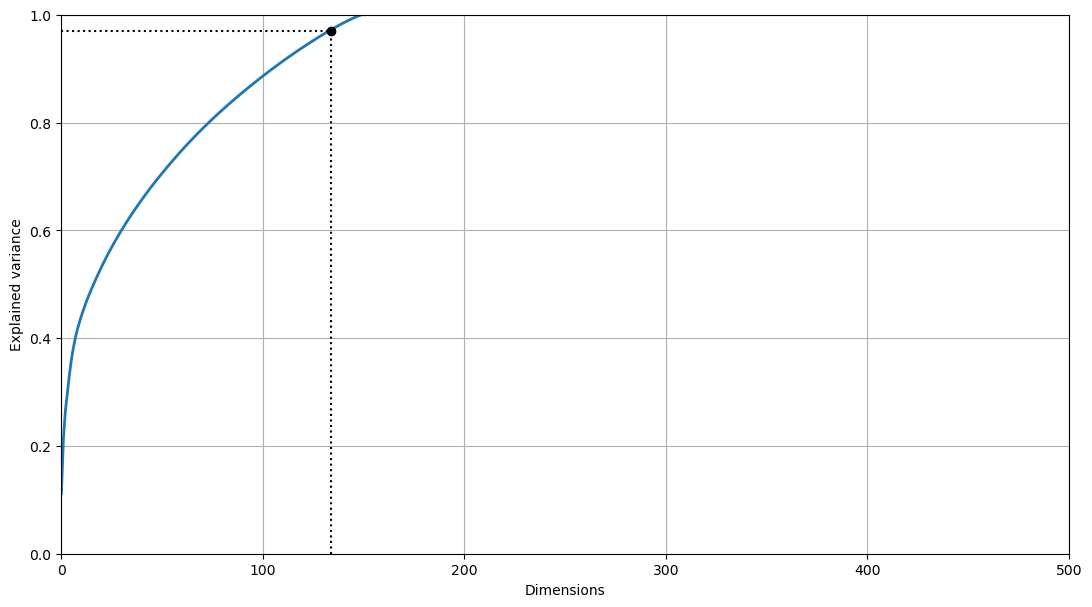

In [20]:
plt.figure(figsize=(13,7))
plt.plot(cumsum,linewidth=2)
plt.axis([0,500,0,1])
plt.xlabel('Dimensions')
plt.ylabel('Explained variance')
plt.plot([dims,dims],[0,0.97],'k:')
plt.plot([0,dims],[0.97,0.97],'k:')
plt.plot(dims,0.97,'ko')
plt.grid(True)
plt.savefig('explained variance ratio plot', dpi=300)
plt.show()